In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit


In [113]:
# Loading my the dataset
df = pd.read_csv('yield_df.csv')

# Display the first few rows of the dataset
print(df.head())
df.head(10)

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [114]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [115]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [117]:
df.corr(numeric_only=True)

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Unnamed: 0,1.000000,0.043850,0.013395,-0.228755,-0.316017,-0.051584
Year,0.043850,1.000000,0.091630,-0.003798,0.140930,0.014409
hg/ha_yield,0.013395,0.091630,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,-0.228755,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,-0.316017,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,-0.051584,0.014409,-0.114777,0.313040,0.030946,1.000000


In [118]:
# Function to show various statistical depth
def show_statistical_depth():
    """
    Shows statistical depth including mean, median, standard deviation, skewness, kurtosis, correlation matrix, and basic descriptive statistics.
    """
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Calculatting major variables
    mean = numeric_df.mean()
    median = numeric_df.median()
    std_dev = numeric_df.std()
    skewness = numeric_df.skew()
    kurtosis = numeric_df.kurtosis()
    
    # Display of major variables
    print("Mean:\n", mean)
    print("\nMedian:\n", median)
    print("\nStandard Deviation:\n", std_dev)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)
show_statistical_depth()
    

Mean:
 Unnamed: 0                       14120.500000
Year                              2001.544296
hg/ha_yield                      77053.332094
average_rain_fall_mm_per_year     1149.055980
pesticides_tonnes                37076.909344
avg_temp                            20.542627
dtype: float64

Median:
 Unnamed: 0                       14120.50
Year                              2001.00
hg/ha_yield                      38295.00
average_rain_fall_mm_per_year     1083.00
pesticides_tonnes                17529.44
avg_temp                            21.51
dtype: float64

Standard Deviation:
 Unnamed: 0                        8152.907488
Year                                 7.051905
hg/ha_yield                      84956.612897
average_rain_fall_mm_per_year      709.812150
pesticides_tonnes                59958.784665
avg_temp                             6.312051
dtype: float64

Skewness:
 Unnamed: 0                       0.000000
Year                             0.012243
hg/ha_yield     

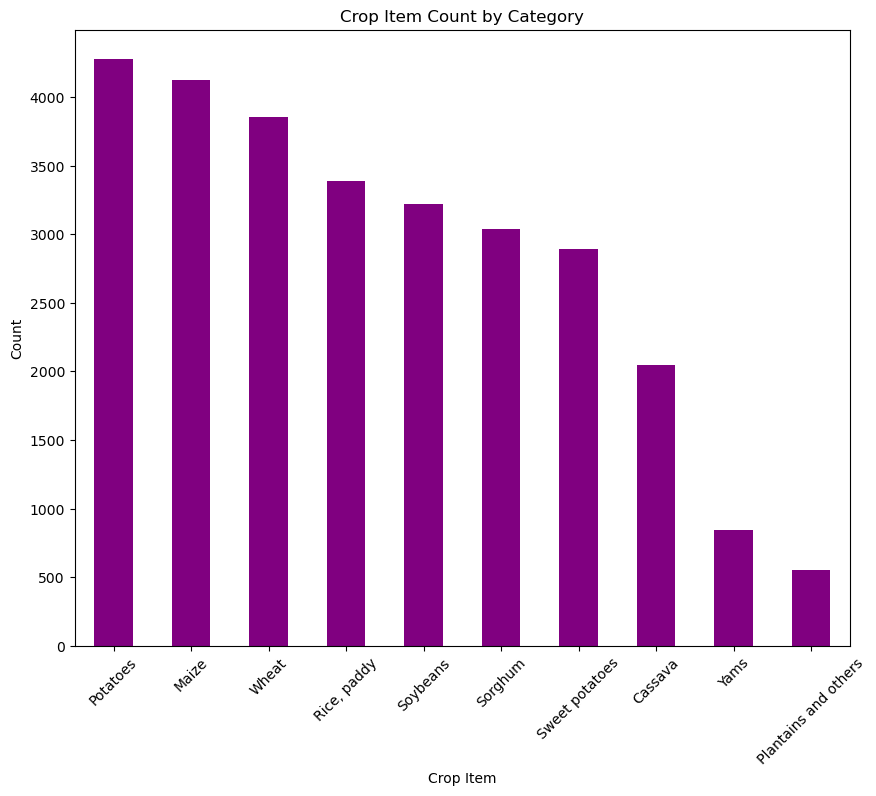

In [119]:
# The function to plot a bar chart for crop items with their counts
def plot_categorical_graph(df):
    """
    Plot a bar chart to visualize the count for each crop item.
    :param df: pd.DataFrame - The input dataset
    """
    # Get the count of each 'Item'
    item_counts = df['Item'].value_counts()

    # Create a figure with a specific size
    plt.figure(figsize=(10, 8))
    item_counts.plot(kind='bar', color='purple')
    plt.title('Crop Item Count by Category')
    plt.xlabel('Crop Item')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
plot_categorical_graph(df)

Silhouette Score: 0.49


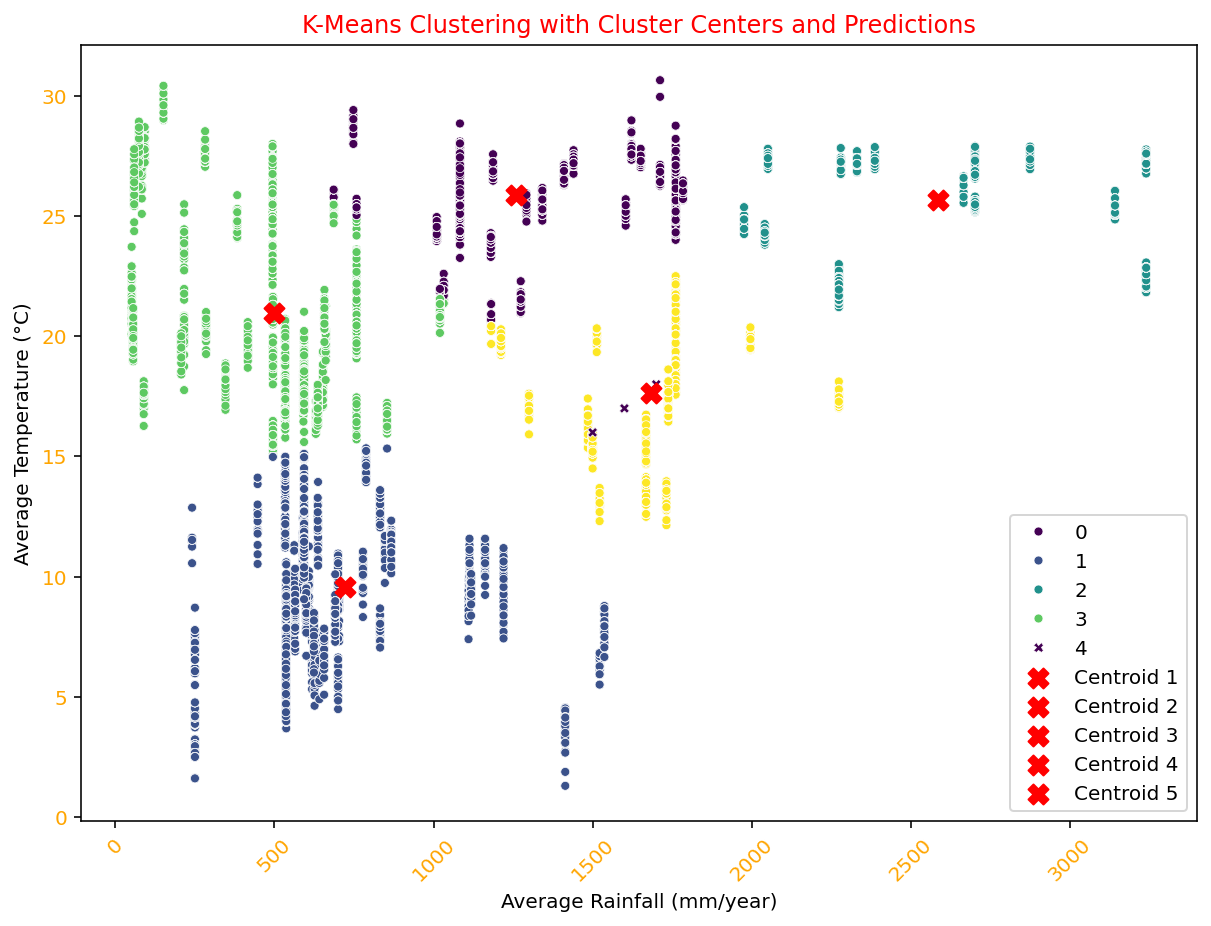

In [120]:
# Selecting features for clustering from my dataset and standadise please note this code will have some predictions
features = ['average_rain_fall_mm_per_year', 'avg_temp']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Determine the optimal number of clusters using the silhouette score
range_n_clusters = range(2, 6)
best_score = -1
best_k = 0

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    if score > best_score:
        best_score = score
        best_k = n_clusters

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# to create a custom colormap for plotting
colours = plt.cm.Set1(np.linspace(0, 1, best_k))
cmap = ListedColormap(colours)

# Function to perform k-means clustering and plot the clusters with predictions
def kmeans_clustering():
    """
    Performs k-means clustering and plots the clusters with predictions.
    """
    # Back scale the cluster centers to original scale
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # here i will try to predict new points and attach them to an appropriate groups
    new_points = [[1500, 16], [1600, 17], [1700, 18]]
    new_points_df = pd.DataFrame(new_points, columns=['average_rain_fall_mm_per_year', 'avg_temp'])
    new_points_normalized = scaler.transform(new_points_df)
    
    new_clusters = kmeans.predict(new_points_normalized)
    new_points_df['Cluster'] = new_clusters
    
    plt.figure(figsize=(10, 7), dpi=144)
    
    # here is code for oraginal data
    sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='avg_temp', hue='Cluster', palette='viridis', alpha=1, edgecolor='w', s=20)

    # here is code for predicted data
    sns.scatterplot(data=new_points_df, x='average_rain_fall_mm_per_year', y='avg_temp', hue='Cluster', palette='viridis', alpha=1, marker='X', s=25, edgecolor='w')

    # Plot of cluster centers
    for i, center in enumerate(cluster_centers):
        plt.scatter(center[0], center[1], s=100, c='red', marker='X', label=f'Centroid {i+1}')
    
    plt.title('K-Means Clustering with Cluster Centers and Predictions', color='red')
    plt.xlabel('Average Rainfall (mm/year)')
    plt.ylabel('Average Temperature (°C)')
    
    # Legend for cluster centers and new points
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    # Here I'm adding centroid labels manually to avoid duplicates
    by_label.update({f'Centroid {i+1}': handles[-(i+1)] for i in range(len(cluster_centers))})
    if by_label:
        plt.legend(by_label.values(), by_label.keys())
        silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
    print(f'Silhouette Score: {silhouette_avg:.2f}')
    plt.xticks(rotation=45, fontsize=10, color='orange')
    plt.yticks(fontsize=10, color='orange')
    plt.savefig('kmeans.png')
    plt.show()
kmeans_clustering()

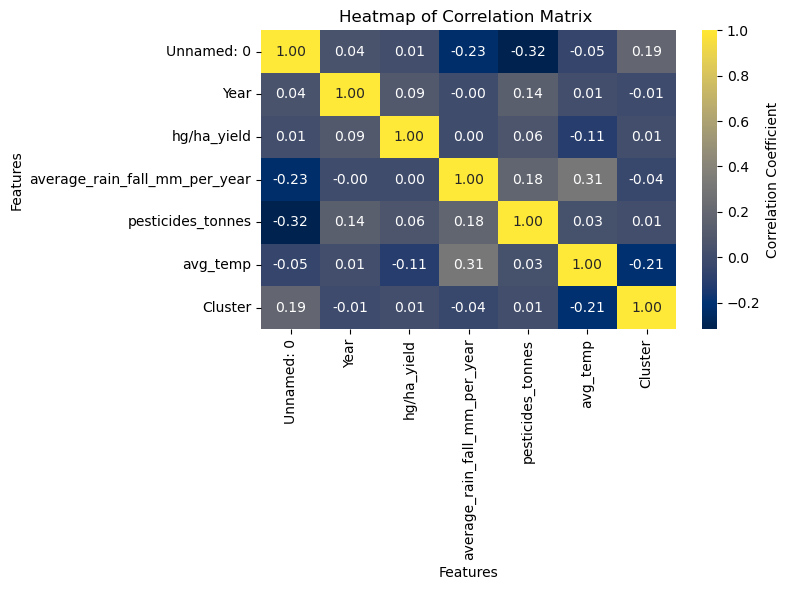

In [121]:
#Here is the heatmap fuction for number columns please note unamed is just the count of data
def show_correlation_matrix():
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Create the correlation matrix and plotting
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f', 
                xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Heatmap of Correlation Matrix ', fontsize=12)
    plt.xlabel('Features', fontsize=10)
    plt.ylabel('Features', fontsize=10)
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.show()
show_correlation_matrix()

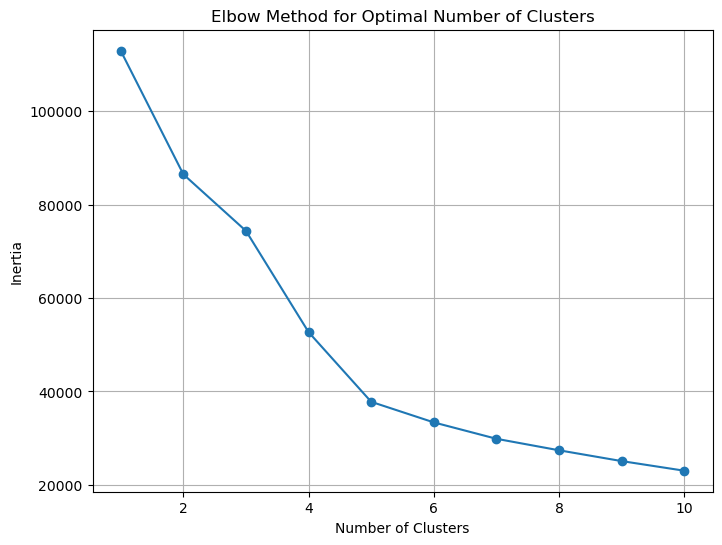

In [122]:
# Extracting the numerical columns for clustering
numerical_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
df_numerical = df[numerical_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

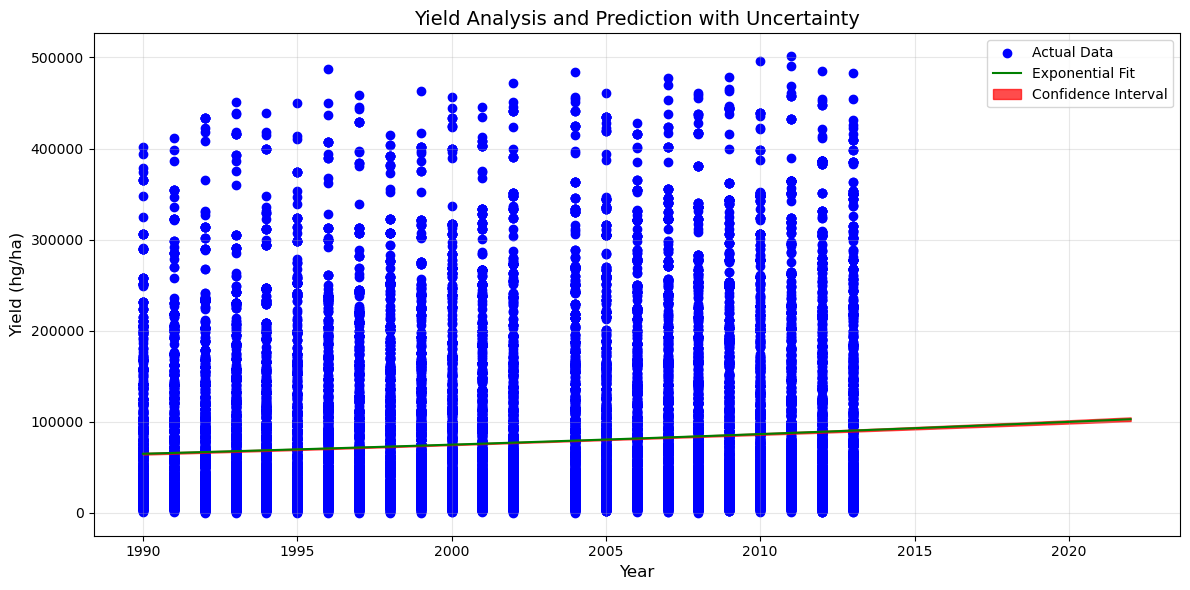

Fit Parameters: N0 = 64938.72 ± 891.36, g = 0.0144 ± 0.0009


In [9]:
# I will choose years and yields to try and predict with use of actaul data
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['hg/ha_yield'] = pd.to_numeric(df['hg/ha_yield'], errors='coerce')
df = df.dropna(subset=['Year', 'hg/ha_yield'])

# the exponential function for fitting
def exponential(x, n0, g):
    return n0 * np.exp(g * x)

# Normalize year data for better fitting
xdata = df['Year'].values - min(df['Year'].values)
ydata = df['hg/ha_yield'].values
p, cov = curve_fit(exponential, xdata, ydata, p0=(1e4, 0.02))
sigma = np.sqrt(np.diag(cov))
future_years = np.arange(min(df['Year']), max(df['Year']) + 10)
x_future = future_years - min(df['Year'])
future_predictions = exponential(x_future, *p)

# Here i will make some prediction 
sample_params = multivariate_normal.rvs(mean=p, cov=cov, size=1000)
future_uncertainties = [np.std(exponential(year, *sample_params.T)) for year in x_future]
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['hg/ha_yield'], label='Actual Data', color='blue')
plt.plot(future_years, future_predictions, label='Exponential Fit', color='green')
plt.fill_between(
    future_years,
    future_predictions - future_uncertainties,
    future_predictions + future_uncertainties,
    color='red', alpha=0.7, label='Confidence Interval')
# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield (hg/ha)', fontsize=12)
plt.title('Yield Analysis and Prediction with Uncertainty', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Fit Parameters: N0 = {p[0]:.2f} ± {sigma[0]:.2f}, g = {p[1]:.4f} ± {sigma[1]:.4f}")